In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("C:/Users/webde/Downloads/world-data.xlsx", header=None,
                  names = ['Country', 'Population', 'Gdp', 'Happiness', 'Democracy', 'Inequality'])
print("Dataframe Shape", df.shape)
print("DataFrame Columns", df.columns)
df.info()

Dataframe Shape (112, 6)
DataFrame Columns Index(['Country', 'Population', 'Gdp', 'Happiness', 'Democracy', 'Inequality'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     112 non-null    object 
 1   Population  112 non-null    float64
 2   Gdp         112 non-null    float64
 3   Happiness   112 non-null    float64
 4   Democracy   112 non-null    float64
 5   Inequality  112 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.4+ KB


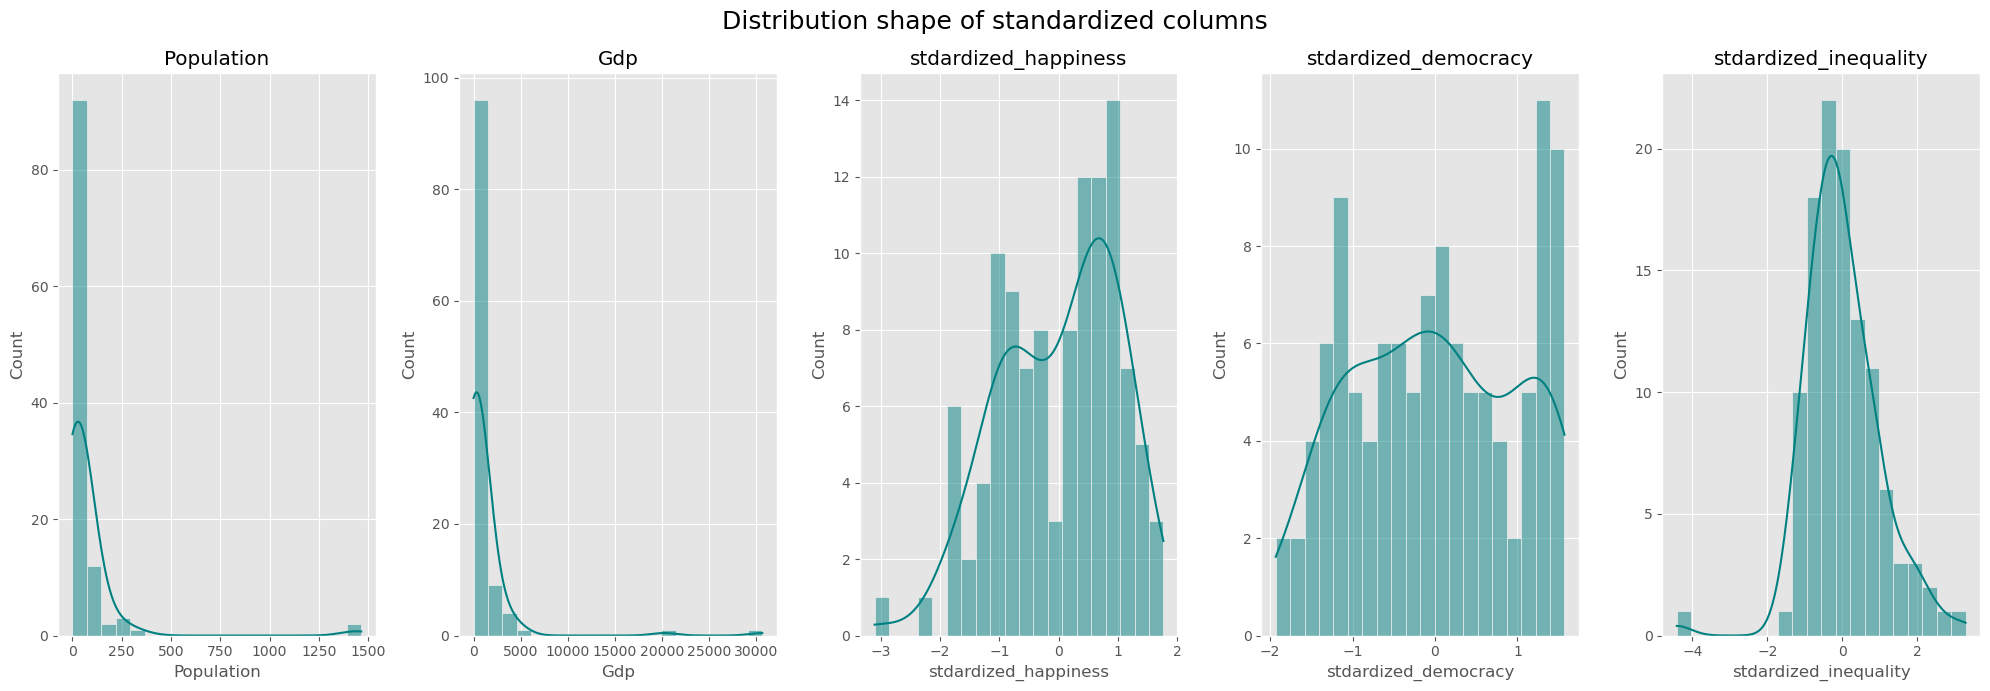

In [3]:
named_df = df.copy()
named_df['stdardized_happiness'] = ((named_df['Happiness']-named_df['Happiness'].mean())/(named_df['Happiness'].std()))
named_df['stdardized_democracy'] = ((named_df['Democracy']-named_df['Democracy'].mean())/(named_df['Democracy'].std()))
named_df['stdardized_inequality'] = ((named_df['Inequality']-named_df['Inequality'].mean())/(named_df['Inequality'].std()))

# Select only the standardized columns for plotting
selected_cols = named_df[['Population', 'Gdp','stdardized_happiness', 'stdardized_democracy', 'stdardized_inequality']]
fig, axes = plt.subplots(1, len(selected_cols.columns), figsize=(20, 7))
for idx, col in enumerate(selected_cols.columns):
	sns.histplot(data=selected_cols, x=col, bins=20, color='teal', kde=True, ax=axes[idx])
	axes[idx].set_title(col)
plt.suptitle('Distribution shape of standardized columns', fontsize=18)
plt.tight_layout()
plt.show()

In [4]:
print(round(named_df.tail(),2))

      Country  Population     Gdp  Happiness  Democracy  Inequality  \
107   uruguay        3.39   85.10       6.61       0.77        40.6   
108  hondoras       11.10  119.86       5.97       0.51        48.2   
109   liberia        5.73   15.74       4.27       0.57        35.3   
110  maldives        0.53    7.26       5.21       0.42        29.3   
111    serbia        6.70   92.82       6.41       0.63        33.1   

     stdardized_happiness  stdardized_democracy  stdardized_inequality  
107                  0.85                  0.85                   0.52  
108                  0.34                 -0.15                   1.46  
109                 -1.04                  0.08                  -0.13  
110                 -0.28                 -0.50                  -0.87  
111                  0.69                  0.31                  -0.40  


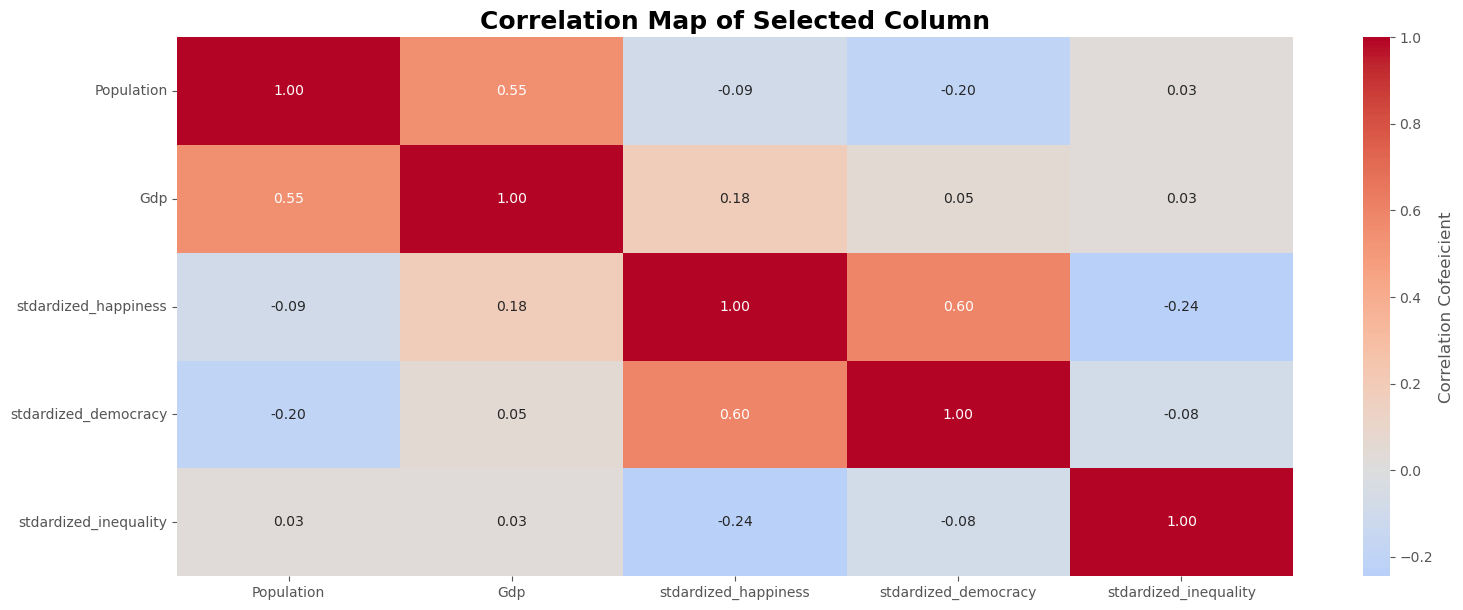

In [5]:
plt.figure(figsize =(18,7))
sns.heatmap(selected_cols.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f',
            cbar_kws={'label': 'Correlation Cofeeicient'})
plt.title("Correlation Map of Selected Column", fontsize=18, fontweight='bold')
plt.show()

In [6]:
import statsmodels.formula.api as smf
formula = 'Gdp~Population+stdardized_happiness+stdardized_inequality'
reg = smf.ols(formula, data=named_df).fit()
print("Regression Results:\n")
display(reg.summary())

Regression Results:



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Gdp   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     19.75
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           2.81e-10
Time:                        14:22:45   Log-Likelihood:                -1048.4
No. Observations:                 112   AIC:                             2105.
Df Residuals:                     108   BIC:                             2116.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               316.3630    287.740      1.099      0.274    -253.987     886.713
Population               10.1933      1.397      7.297      0.000       7.424      12.962
stdardized_happiness    845.4967    281.374      3.005      0.003     287.765    1403.228
stdardized_inequality   236.2160    280.476      0.842      0.402    -319.737     792.169
==============================================================================
Omnibus:                      187.500   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18660.428
Skew:                           6.546   Prob(JB):                         0.00
Kurtosis:                      64.865   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
from sklearn.linear_model import LinearRegression
X = named_df[['Population', 'stdardized_happiness','stdardized_inequality']]
y = named_df['Gdp']
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

table_form = pd.DataFrame({
	'Country': named_df['Country'].str.capitalize(),
 'Actual': y,
 'Predicted': y_pred,
 'Error (%)': 100*(y_pred - y/y)
})
all = table_form.sort_values('Actual')
display(round(all, 2))

,Country,Actual,Predicted,Error (%)
49,Gambia,2.70,-313.21,-31420.98
105,Surinam,4.50,895.60,89460.42
68,Eswatini,5.20,-547.16,-54816.34
110,Maldives,7.26,-119.74,-12073.62
47,Malawi,11.30,-859.11,-86011.47
...,...,...,...,...
4,India,4130.00,14230.31,1422931.25
3,Japan,4280.00,1841.82,184082.14
2,Germany,5010.00,1876.14,187513.74
1,China,20230.00,15015.36,1501436.15


In [8]:
# Model validation parameters
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
r2 = r2_score(y, y_pred)
print("R-Squared", round(r2,3))
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)*100
print("Mean Absolute Percentage Error (MAPE)", round(mape,2))
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
rmpse = np.sqrt(np.mean(((y - y_pred)/y)**2))*100
print("Root Mean Squared Percentage Error", round(rmpse,2))

R-Squared 0.354
Mean Absolute Percentage Error (MAPE) 1120.34
Root Mean Squared Percentage Error 2916.8


In [9]:
log_gdp = np.log(named_df['Gdp'])
formula = 'log_gdp~Population+stdardized_happiness+stdardized_inequality'
log_reg = smf.ols(formula, data=named_df).fit()
print("Log Regression Results:\n")
display(log_reg.summary())

Log Regression Results:



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_gdp   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           1.16e-16
Time:                        14:22:46   Log-Likelihood:                -184.03
No. Observations:                 112   AIC:                             376.1
Df Residuals:                     108   BIC:                             386.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.9458      0.128     38.647      0.000       4.692       5.200
Population                0.0043      0.001      6.927      0.000       0.003       0.006
stdardized_happiness      1.0454      0.125      8.353      0.000       0.797       1.293
stdardized_inequality     0.0154      0.125      0.123      0.902      -0.232       0.263
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.524
Skew:                          -0.276   Prob(JB):                        0.467
Kurtosis:                       3.151   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# prediction and model validation - log model
log_y = log_gdp
log_model = LinearRegression()
log_model.fit(X,log_y)
log_y_pred = log_model.predict(X)

table_form = pd.DataFrame({
	'Country': named_df['Country'].str.capitalize(),
 'Actual': log_y,
 'Predicted': log_y_pred,
 'Error (%)': 100*(log_y_pred - log_y/log_y) 
})
all = table_form.sort_values('Actual')
display(round(all,2))

,Country,Actual,Predicted,Error (%)
49,Gambia,0.99,4.06,306.06
105,Surinam,1.50,5.56,455.95
68,Eswatini,1.65,3.25,224.55
110,Maldives,1.98,4.64,364.26
47,Malawi,2.42,3.24,223.66
...,...,...,...,...
4,India,8.33,9.97,897.36
3,Japan,8.36,5.90,489.81
2,Germany,8.52,6.31,531.19
1,China,9.91,11.39,1039.03


In [11]:
r2 = r2_score(log_y, log_y_pred)
print("R-Squared (log model)", round(r2,3))
mae = mean_absolute_error(log_y, log_y_pred)
print("Mean Absolute Error (MAE)", round(mae,3))
mape = mean_absolute_percentage_error(log_y, log_y_pred)*100
print("Mean Absolute Percentage Error (MAPE)", round(mape,2))
mse = mean_squared_error(log_y, log_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error", round(rmse,3))
rmpse = np.sqrt(np.mean(((log_y - log_y_pred)/log_y)**2))*100
print("Root Mean Percentage Squared Error", round(rmpse,2))

R-Squared (log model) 0.51
Mean Absolute Error (MAE) 0.999
Mean Absolute Percentage Error (MAPE) 25.25
Root Mean Squared Error 1.251
Root Mean Percentage Squared Error 47.82
